# Smoking

In [1]:
import pandas as pd

import sys
from pathlib import Path
# Add the parent directory to the sys.path (without this we cannot import constants or scripts)
sys.path.insert(0, str(Path.cwd().parent))
from constants.countries import highincome_countries
from src import generate_high_income_global_avg_index
from src.plotting import plot_value_per_year_GER_HIC_GLO

## Load data

In [2]:
DATA_PATH = "../data/final/"
OUTPUT_PATH = "output/" # if you want to save the plots
smoking_data_path = DATA_PATH + "share-of-adults-who-smoke.csv"

In [3]:
smoking_df = pd.read_csv(smoking_data_path)
smoking_df

,Entity,Code,Year,Prevalence of current tobacco use (% of adults)
0,Afghanistan,AFG,2000,36.9
1,Afghanistan,AFG,2005,32.7
2,Afghanistan,AFG,2010,29.1
3,Afghanistan,AFG,2015,26.0
4,Afghanistan,AFG,2018,23.8
...,...,...,...,...
1234,Zimbabwe,ZWE,2010,15.6
1235,Zimbabwe,ZWE,2015,13.6
1236,Zimbabwe,ZWE,2018,12.1
1237,Zimbabwe,ZWE,2019,12.1


## Add 'Global' average and 'High-income countries' average

In [13]:
# Appending the average data to the original DataFrame
smoking_df_wrld = generate_high_income_global_avg_index(df = smoking_df, country_name_col = "Entity", country_code_col = "Code", value_col = "Prevalence of current tobacco use (% of adults)")

# Display the last few rows to verify the appended averages
smoking_df_wrld.tail(10)

,Entity,Code,Year,Prevalence of current tobacco use (% of adults)
4,High-income,HIC,2018,23.006452
5,High-income,HIC,2019,23.006452
6,High-income,HIC,2020,22.529032
0,Global,GLB,2000,30.153653
1,Global,GLB,2005,27.107799
2,Global,GLB,2010,24.516467
3,Global,GLB,2015,22.302867
4,Global,GLB,2018,20.787701
5,Global,GLB,2019,20.786808
6,Global,GLB,2020,20.414467


## Plot the result

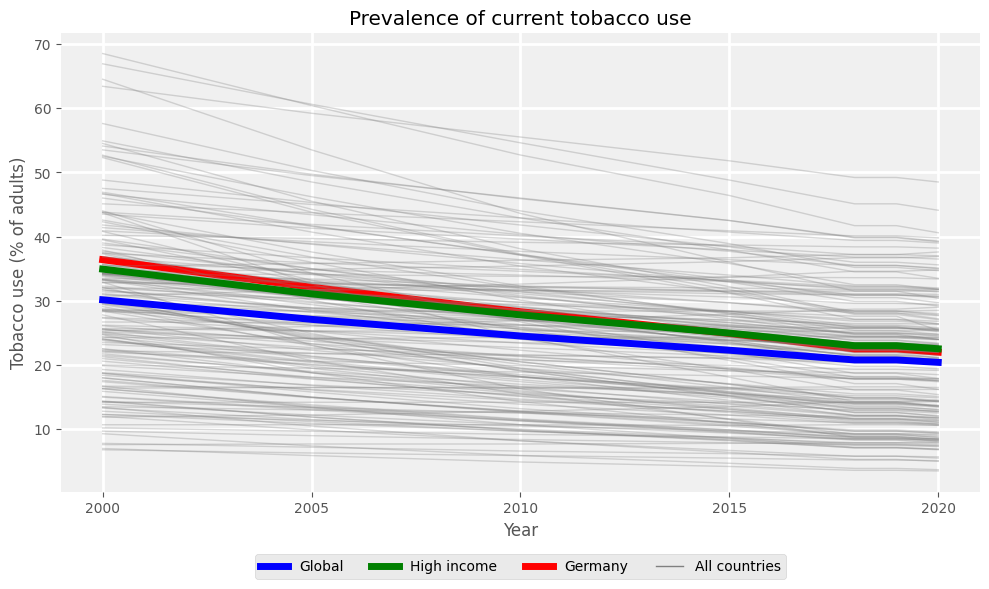

In [16]:
plot_value_per_year_GER_HIC_GLO(
    smoking_df_wrld, 
    output_fig_path = OUTPUT_PATH + "TobaccoUsePercentage.pdf",
    xlabel = 'Year',
    ylabel = "Tobacco use (% of adults)",
    title = "Prevalence of current tobacco use",
    country_column = "Entity",
    value_column = "Prevalence of current tobacco use (% of adults)",
    xticks = 5)